In [1]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [2]:
cargaticker = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(cargaticker[0])
df['Symbol'] = df['Symbol'].str.replace(".", "-")
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()
data = pd.DataFrame()
for t,s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2000-01-01', end='2021-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices.csv', sep=',')

C:\Users\Cecilia\AppData\Local\Temp\ipykernel_10556\1879334424.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Symbol'] = df['Symbol'].str.replace(".", "-")
C:\Users\Cecilia\AppData\Local\Temp\ipykernel_10556\1879334424.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\Cecilia\AppData\Local\Temp\ipykernel_10556\1879334424.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\Cecilia\AppData\Local\Temp\ipykernel_10556\1879334424.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p


1 Failed download:
- CEG: Data doesn't exist for startDate = 946695600, endDate = 1640919600


C:\Users\Cecilia\AppData\Local\Temp\ipykernel_10556\1879334424.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\Cecilia\AppData\Local\Temp\ipykernel_10556\1879334424.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\Cecilia\AppData\Local\Temp\ipykernel_10556\1879334424.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\Cecilia\AppData\Local\Temp\ipykernel_10556\1879334424.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users

In [ ]:
data["Date"] = pd.to_datetime(data["Date"]).apply(lambda x:x.strftime('%d/%m/%Y'))

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467092 entries, 0 to 2467091
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Date         object 
 1   Open         float64
 2   High         float64
 3   Low          float64
 4   Close        float64
 5   Adj Close    float64
 6   Volume       float64
 7   Ticker       object 
 8   GICS         object 
 9   day_of_week  int64  
 10  r_intra      float64
 11  r_gap        float64
 12  var          float64
dtypes: float64(9), int64(1), object(3)
memory usage: 244.7+ MB


In [100]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS
0,01/03/2000,48.031250,48.250000,47.031250,47.187500,26.434851,2173400.0,MMM,Industrials
1,01/04/2000,46.437500,47.406250,45.312500,45.312500,25.384462,2713800.0,MMM,Industrials
2,01/05/2000,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials
3,01/06/2000,47.156250,51.250000,47.156250,50.375000,28.220516,5975800.0,MMM,Industrials
4,01/07/2000,50.562500,51.906250,49.968750,51.375000,28.780718,4101200.0,MMM,Industrials
...,...,...,...,...,...,...,...,...,...
2467087,23/12/2021,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care
2467088,27/12/2021,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care
2467089,28/12/2021,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care
2467090,29/12/2021,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care


In [101]:
data2=data.copy()

In [ ]:
data['day_of_week'] = data['Date'].apply(pd.to_datetime).dt.dayofweek

In [106]:
data['r_intra'] =data.apply(
    lambda row: np.log(row.Close/row.Open), axis=1).fillna(0)

In [107]:
data['close2']=data.shift(periods=1).Close

In [108]:
data['r_gap'] = data.apply(lambda row: np.log(row.Open/row.close2), axis = 1).fillna(0)

In [117]:
for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['r_gap'][i+1] = 0

C:\Users\Cecilia\AppData\Local\Temp\ipykernel_15004\978449100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['r_gap'][i+1] = 0


In [110]:
#data["r_gap"]=data.apply(lambda x: "0" if x["Date"] =="01/03/2000"  else x["r_gap"], axis=1)

In [118]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap
0,01/03/2000,48.031250,48.250000,47.031250,47.187500,26.434851,2173400.0,MMM,Industrials,0,-0.017723,0
1,01/04/2000,46.437500,47.406250,45.312500,45.312500,25.384462,2713800.0,MMM,Industrials,1,-0.024524,-0.016022
2,01/05/2000,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2,0.023052,0.005502
3,01/06/2000,47.156250,51.250000,47.156250,50.375000,28.220516,5975800.0,MMM,Industrials,3,0.066028,0.01133
4,01/07/2000,50.562500,51.906250,49.968750,51.375000,28.780718,4101200.0,MMM,Industrials,4,0.015941,0.003715
...,...,...,...,...,...,...,...,...,...,...,...,...
2467087,23/12/2021,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3,0.003346,0.000538
2467088,27/12/2021,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0,0.008637,0.007722
2467089,28/12/2021,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1,-0.011196,0.001986
2467090,29/12/2021,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2,0.012260,-0.000942


In [113]:
data.drop(columns='close2', inplace=True)

In [124]:
data[data.Ticker=='KO']

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,var
581021,01/03/2000,29.000000,29.000000,27.625000,28.187500,15.225268,10997000.0,KO,Consumer Staples,0,-0.028417,0,0.000000
581022,01/04/2000,28.187500,28.406250,27.812500,28.218750,15.242140,7308000.0,KO,Consumer Staples,1,0.001108,0.0,0.001108
581023,01/05/2000,28.218750,28.718750,28.031250,28.468750,15.377175,9457400.0,KO,Consumer Staples,2,0.008820,0.0,0.008859
581024,01/06/2000,28.468750,28.843750,28.281250,28.500000,15.394056,7129200.0,KO,Consumer Staples,3,0.001097,0.0,0.001098
581025,01/07/2000,28.937500,30.375000,28.937500,30.375000,16.406822,11474000.0,KO,Consumer Staples,4,0.048482,0.015234,0.065789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586551,23/12/2021,58.520000,58.610001,57.939999,58.220001,57.363277,11027300.0,KO,Consumer Staples,3,-0.005140,0.005827,0.000688
586552,27/12/2021,58.000000,58.689999,58.000000,58.650002,57.786949,9860000.0,KO,Consumer Staples,0,0.011145,-0.003786,0.007386
586553,28/12/2021,58.400002,58.939999,58.299999,58.880001,58.013565,8979900.0,KO,Consumer Staples,1,0.008186,-0.004272,0.003922
586554,29/12/2021,58.950001,59.099998,58.660000,58.950001,58.082535,9996000.0,KO,Consumer Staples,2,0.000000,0.001188,0.001189


In [121]:
data['var'] =data["Adj Close"].pct_change()

In [123]:
for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['var'][i+1] = 0

C:\Users\Cecilia\AppData\Local\Temp\ipykernel_15004\2480454442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['var'][i+1] = 0


In [122]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,var
0,01/03/2000,48.031250,48.250000,47.031250,47.187500,26.434851,2173400.0,MMM,Industrials,0,-0.017723,0,NaN
1,01/04/2000,46.437500,47.406250,45.312500,45.312500,25.384462,2713800.0,MMM,Industrials,1,-0.024524,-0.016022,-0.039735
2,01/05/2000,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2,0.023052,0.005502,0.028965
3,01/06/2000,47.156250,51.250000,47.156250,50.375000,28.220516,5975800.0,MMM,Industrials,3,0.066028,0.01133,0.080429
4,01/07/2000,50.562500,51.906250,49.968750,51.375000,28.780718,4101200.0,MMM,Industrials,4,0.015941,0.003715,0.019851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467087,23/12/2021,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3,0.003346,0.000538,0.003891
2467088,27/12/2021,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0,0.008637,0.007722,0.016494
2467089,28/12/2021,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1,-0.011196,0.001986,-0.009168
2467090,29/12/2021,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2,0.012260,-0.000942,0.011382


In [125]:
data['var'].fillna(0, inplace=True)

In [126]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,var
0,01/03/2000,48.031250,48.250000,47.031250,47.187500,26.434851,2173400.0,MMM,Industrials,0,-0.017723,0,0.000000
1,01/04/2000,46.437500,47.406250,45.312500,45.312500,25.384462,2713800.0,MMM,Industrials,1,-0.024524,-0.016022,-0.039735
2,01/05/2000,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2,0.023052,0.005502,0.028965
3,01/06/2000,47.156250,51.250000,47.156250,50.375000,28.220516,5975800.0,MMM,Industrials,3,0.066028,0.01133,0.080429
4,01/07/2000,50.562500,51.906250,49.968750,51.375000,28.780718,4101200.0,MMM,Industrials,4,0.015941,0.003715,0.019851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467087,23/12/2021,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3,0.003346,0.000538,0.003891
2467088,27/12/2021,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0,0.008637,0.007722,0.016494
2467089,28/12/2021,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1,-0.011196,0.001986,-0.009168
2467090,29/12/2021,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2,0.012260,-0.000942,0.011382


In [134]:
data.r_gap= data.r_gap.astype("float")

In [128]:
data3=data.copy()

Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimiento gap

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467092 entries, 0 to 2467091
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Date         object 
 1   Open         float64
 2   High         float64
 3   Low          float64
 4   Close        float64
 5   Adj Close    float64
 6   Volume       float64
 7   Ticker       object 
 8   GICS         object 
 9   day_of_week  int64  
 10  r_intra      float64
 11  r_gap        object 
 12  var          float64
dtypes: float64(8), int64(1), object(4)
memory usage: 244.7+ MB


In [135]:
data4= data.groupby('day_of_week')['r_gap'].mean().reset_index()

In [137]:
data4.sort_values('r_gap')

,day_of_week,r_gap
0,0,0.000039
3,3,0.000056
2,2,0.000116
4,4,0.000223
1,1,0.000577


In [181]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,var
0,01/03/2000,48.031250,48.250000,47.031250,47.187500,26.434851,2173400.0,MMM,Industrials,0,-0.017723,0.000000,0.000000
1,01/04/2000,46.437500,47.406250,45.312500,45.312500,25.384462,2713800.0,MMM,Industrials,1,-0.024524,-0.016022,-0.039735
2,01/05/2000,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2,0.023052,0.005502,0.028965
3,01/06/2000,47.156250,51.250000,47.156250,50.375000,28.220516,5975800.0,MMM,Industrials,3,0.066028,0.011330,0.080429
4,01/07/2000,50.562500,51.906250,49.968750,51.375000,28.780718,4101200.0,MMM,Industrials,4,0.015941,0.003715,0.019851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467087,23/12/2021,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3,0.003346,0.000538,0.003891
2467088,27/12/2021,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0,0.008637,0.007722,0.016494
2467089,28/12/2021,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1,-0.011196,0.001986,-0.009168
2467090,29/12/2021,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2,0.012260,-0.000942,0.011382


In [193]:
dataprueba= data[data["Date"] > '01/01/2015']

In [194]:
dataprueba["Date"] = pd.Timestamp(dataprueba["Date"])

TypeError: Cannot convert input [0          01/03/2000
1          01/04/2000
2          01/05/2000
3          01/06/2000
4          01/07/2000
              ...    
2467087    23/12/2021
2467088    27/12/2021
2467089    28/12/2021
2467090    29/12/2021
2467091    30/12/2021
Name: Date, Length: 2467092, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

In [187]:
df_precios_agrupado = df_precios.groupby('Ticker').agg({'Date':'max', 'Ret_Intradiario':'mean', 'Ret_Gaps':'mean', 'Volatilidad':'mean'})

NameError: name 'df_precios' is not defined

In [188]:
dataprueba = dataprueba.groupby("Date").agg({ 'Open':'mean', 'High':'mean', 'Low':'mean', 'Close':'mean', 'Adj Close':'mean','r_intra':'mean', 'r_gap':'mean'})

In [189]:
dataprueba

,Open,High,Low,Close,Adj Close,r_intra,r_gap
Date,,,,,,,
01/02/2001,35.448196,35.802302,33.902260,34.400799,22.163202,-0.028437,-0.001991
01/02/2002,32.275786,32.561025,31.613361,32.252894,21.134292,-0.000529,-0.001599
01/02/2003,26.388430,27.119059,26.176767,27.015521,17.982085,0.021532,0.006775
01/02/2004,33.834913,34.151893,33.448610,33.661440,23.097668,-0.003697,0.001723
01/02/2008,49.262753,49.689979,48.032255,48.434930,36.393943,-0.017110,-0.001696
...,...,...,...,...,...,...,...
31/12/2014,80.537631,81.019223,79.484383,79.627539,70.673612,-0.011781,0.001919
31/12/2015,82.937322,83.523616,82.221316,82.490705,74.776805,-0.004857,-0.003876
31/12/2018,104.321307,105.332729,103.182229,104.672228,99.897957,0.003612,0.004856


In [192]:
dataprueba["Date"] = pd.Timestamp(dataprueba["Date"])

KeyError: 'Date'

In [190]:
dataprueba.index = pd.DatetimeIndex(dataprueba['Date'])

KeyError: 'Date'

In [191]:
mpf.plot(dataprueba)

TypeError: Expect data.index as DatetimeIndex

In [161]:
dataprueba.set_index('Date', inplace = True)


In [162]:
dataprueba

,r_gap
Date,
01/02/2001,-0.001991
01/02/2002,-0.001599
01/02/2003,0.006775
01/02/2004,0.001723
01/02/2008,-0.001696
...,...
31/12/2014,0.001919
31/12/2015,-0.003876
31/12/2018,0.004856


In [164]:
dataprueba.index.name = 'Date'

In [166]:
dataprueba

,r_gap
Date,
01/02/2001,-0.001991
01/02/2002,-0.001599
01/02/2003,0.006775
01/02/2004,0.001723
01/02/2008,-0.001696
...,...
31/12/2014,0.001919
31/12/2015,-0.003876
31/12/2018,0.004856


In [168]:
mpf.plot(dataprueba,type='line')

TypeError: Expect data.index as DatetimeIndex

Text(0.5, 1.0, ' S&P500 Index')

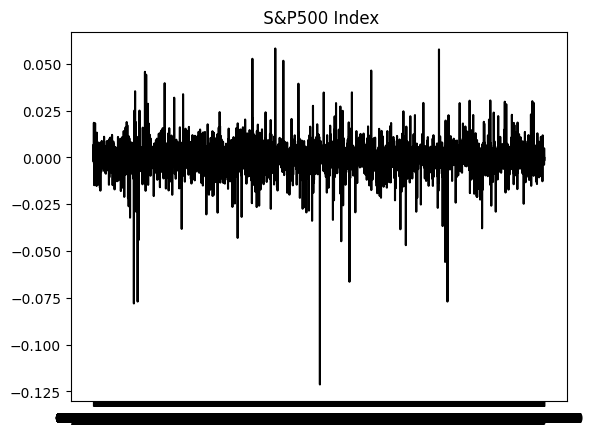

In [148]:
plt.plot(dataprueba['Date'], dataprueba.r_gap, c='black')
plt.title(' S&P500 Index')